# Health Insurance Cross-Sell

Neste trabalho, estamos lidando com uma empresa que fornece seguros de saúde para os seus assegurados. Todos pagam um valor anual para ter direito ao seguro. O time de produto está querendo lançar um novo produto, que é um seguro de carro, entretanto, antes de lançar, eles querem saber se isto é viável e o quanto isto daria de dinheiro e para quem deveriam oferecer. Para solucionar isso, a equipe fez uma pesquisa entre seus assegurados perguntando se estas pessoas comprariam um seguro de automóvel ou não. Unindo as características que já se tem do cliente com a resposta de "sim" ou "não", é necessário tentar prever qual seria a resposta de pessoas que não participaram da pesquisa. O papel do cientista de dados é, a partir da base de dados que foi respondida, treinar um classificador para então saber se as pessoas novas comprariam um seguro de automóvel ou não.

Existe uma limitação no problema, para fazer esta campanha, existe um limite de pessoas, foi definido pelo time de produtos que seria feito por contato direto, ou seja, ligação telefónica. Basicamente, o time de produtos vai passar uma lista para o time de comercial, que vai ligar para as pessoas e vai oferecer o seguro de automóvel. Entretanto, o time comercial tem um limite de apenas 2 mil ligações, então, entre as 127 mil pessoas que podem receber, precisamos construir uma lista priorizando as 2 mil pessoas com mais chances de conseguir que comprem o seguro. 

## 1. O que é Banco de Dados

A definição de banco de dados basicamente é um software que fica armazenado dentro de um server, uma analogia que pode ser utilizada é em relação ao sistema operacional de um computador, do mesmo jeito que um computador hospeda um sistema operacional, o computador do banco de dados hospeda o banco SQL, seja ele o postgre, o mysql, o oracle, o sql server ou qualquer outro. O Mysql e o Postgre é open source. 

Um computador, como se sabe, tem memória, processador e HD, por isso, é importante se atentar as configurações do servidor onde o banco estará hospedado, para evitar problemas. A equipe de engenharia de dados fica responsável por otimizar os bancos para consumir menos espaço e menos memória.

Um banco de dados se divide em várias tabelas, um exemplo é tabelas de "usuários", onde os dados cadastrais (por exemplo), de um usuário seriam armazenados. Outra tabela pode ser a de "produtos", por exemplo, neste caso aqui um seguro de saúde. Uma outra tabela pode ser a "compra", que também é conhecida como tabela transacional, é uma tabela maior, onde cada compra que acontece adiciona uma linha a esta tabela. Além disso, uma tabela transacional ela tem agregassões com outras tabelas, dentro dela, tem-se qual o usuário que comprou e qual produto ele comprou. Outra tabela é a de "review" sobre o produto, é uma tabela com todos os reviews dos usuários.

A união das tabelas que fazem sentido para o negócio é agrupado em algo chamado "schema", ou seja, o schema é um agrupamento de tabelas que fazem sentido para o negócio é um certo aspecto. Seguindo as mesmas tabelas anteriores, poderia ser um e-commerce de compras e estariamos lidando com um schema de produtos/compras. Outras tabelas possíveis, mesmo que fora deste schema específico, pode ser tabelas que guardam informações das redes sociais, seria um schema de midias sociais por exemplo. 

A união de vários schemas é chamado de "database". Um database, ele é feito fisicamente separado no HD, isso é importante para caso haja uma invasão no sistema não consiga coletar todos seus dados.

## 2. Tipos de Bancos de dados

Os bancos de dados se dividem basicamente em dois tipos: SQL Base e NoSQL Base. O SQL Base é um tipo de banco relacional, ou seja, ele tem relações entre as tabelas e essas relações são dadas por chaves (chaves primárias e chaves estrangeiras). Neste tipo de banco é pouco provável encontrar tabelas que não se relacionem umas com as outras. Além disso, esse tipo de banco tem uma escala vertical, ou seja, é muito mais performático popular uma tabela do que criar novas tabelas. Um banco SQL performa muito melhor para escrita e leitura, e é disso que nasce o conceito de dataware house. Em uma análise de dados é necessário não só ler e escrever, precisa-se de agrupamentos, contagens, operações, entre outros. Este tipo de operação é pesado para um banco SQL, é necessário extrair as informações do banco SQL e montá-lo de uma forma analítica, para isso, foi desenvolvido as dataware house (DW), as teorias de fato-dimensão, snowflakes, etc. Basicamente, é feito uma organização de forma que a análise seja feita de uma forma mais fácil.

O NoSQL é um banco do tipo não relacional, ou seja, as collections (semelhante as tabelas), não precisam necessariamente ter relações entre si. Uma vantagem deste tipo de banco é a escala horizontal, neste caso, é mais performático utilizar várias collections do que popular uma já existente. Este tipo de banco é baseado em documentos, chave-valor e em grafos. Ou seja, existem bancos NoSQL que gravam documentos (arquivos), chave-valor (collections) e grafos (relações de entidade entre si). Todas as redes sociais são bancos do tipo grafos, tem um conjunto de conexões diferentes. Eles não são estruturado, isto é, ele é mais voltado para estrutura de dicionário do que de tabela.

Exemplos de bancos SQL: Oracle, MySQL, SQL Server, PostgreSQL, IBM DB2, Microsoft Access, SQLite, MariaDB (default do Linux)

Exemplos de bancos NoSQL: MongoDB, Cassandra, Redis, HBase, Neo4j (gravos), RavenDB, Oracle NoSQL, Amazon Dynamo DB

## 3. O que é SQL

Fazer uma "query" em um SQL é basicamente pedir três coisas:
1. Selecionar as colunas (SELECT)
2. Dessas tabelas (FROM)
3. Com as seguintes condições (WHERE)

Então, basicamente: selecione as colunas A,B,C da tabela X com as seguintes condições: (por exemplo) X > 10. Estas condições são aplicadas nas linhas. Por boas práticas, começasse pelo FROM, uma vez que é a origem dos dados. Por exemplo: 

FROM 
    
    table_purchases tp (tp é o apelidio para ser mais fácil de chamar a tabela. Como boa prática usa-se as iniciais)
    table_users     tu (mesma ideia da tp, estamos chamando duas tabelas diferentes aqui, de purchases e usuarios). 

Precisa-se então juntar estas tabelas, para isso, usa-se JOIN. Que pode receber LEFT, RIGHT, INNER, entre outras opções. Então ficaria:

FROM 
    
    table_purchase tp
    LEFT table_users tu
     
O LEFT, basicamente seleciona a tabela referencia (tp) e compara com a tabela que será agregada (tu), encontra-se as colunas idênticas para fazer referência e adiciona na tabela a esquerda, neste caso, tp. Caso não haja relação, por exemplo, um ID que identifique o que faz relação com o que, ele retorna a linha com valores nulos. Para identificar quais as colunas serão unidas, usa-se um ON.

FROM 
    
    table_purchase tp
    LEFT table_users tu on (tp.id = tu.id)
     
"id" é o nome da coluna, enquanto tp e tu o nome da tabela. É esperado que a tabela tp e a tabela tu tenham este campo id para fazer a relação. 

Como é possível ver, é fácil errar a organização das tabelas, por isso, é importante fazer um double check a cada união feita pra ter certeza que foi feito corretamente.  

É possível adicionar mais de uma tabela:

FROM 
    
    table_purchase tp 
    LEFT table_users tu on (tp.id = tu.id)
    LEFT table_address ta on (tp.id = ta.id)
     
Como boas práticas, sempre faz a união com a tabela referência e com a tabela do JOIN. Isso pode mudar dependendo da forma como os dados estão organizados. Definido as tabelas que serão usadas, define-se as colunas:

SELECT 
    
    user,
    age,
    address,
    purchase
    
é necessário indicar de qual tabela vem as colunas a partir do apelídio de cada uma.

SELECT

    tu.user,
    tu.age,
    ta.address,
    tp.purchase

Com isso, define-se então as condições, por exemplo, em relação as datas

WHERE

    tp.purchase_date > '2021-01-01'
    AND tu.age > 30
    
ou seja, será selecionado as linhas onde purchase_date maior que 1 de janeiro de 2021 e que a idade seja maior que 30. Além de AND, pode ser usado OR.

Assim, o retorno deve ser uma tabela com todas as condições pedidas.

## 4. Extensões do SQL Standard

1. Oracle

    a. PL/SQL (Procedural Language for SQL)
    
        Procedural é uma função do banco de dados, análogo ao "def" em python, o BD é a procedural. Este procedural é definido a partir de "trigger", do tipo: "Toda vez que uma linha nova for inserida, rode esta procedure". Esta procedure trava o banco, roda a procedure e depois destrava pra leitura e escrita.
        Um exemplo de aplicação é o caixa eletrônico, se, ao mesmo tempo que for sacado o dinheiro, alguém depositar, pode dar algum tipo de confusão, por isso a procedure foi desenvolvida. O banco é travado para rodar a procedure para contagem do dinheiro, verificação de saldo (se está negativo, por exemplo) e depois volta a leitura/escrita novamente. 

2. MySQL

    a. SQL
    
        Em MySQL só há o padrão de SQL.
        
3. SQL Server

    a. PL/SQL
    
    
4. PostgreSQL

    a. PL/pgSQL (Procedural Language for PostgreSQL)


5. IBM DB2

    a. PL/SQL

## 5. Como acessar o banco de dados

Para acessar um banco de dados é necessário basicamente de quatro credenciais. O banco de dados está dentro de um servidor, que tem um software que tem as informações do database, onde o database é a união de schemas que é a união de tabelas. Para acessar qualquer banco de dados é importante saber aonde está o banco, este local é chamado de "host". É o domínio onde o banco está. Toda vez que é necessário acessar um domínio é feito via uma porta, chamada "port". O host é uma API fechada, que para ter acesso é necessário atravessar uma porta, que é onde é feito a requisição. Em seguida, precisa-se do nome do database, com este nome é possível acessar qualquer coisa dentro dele. É necessário ter um usuário/senha, que está ligado diretamente as permissões do schema, nem todos os usuários tem acesso a todos os schemas. Em resumo:

1. Host
   
   Endereço IP do servidor que hospeda o banco de dados

2. Port
    
    A porta de acesso ao servidor
    
    
3. Database
    
    O database que será acessado
    

4. Username/Password
    
    Nome de usuário e senha para acessar os schemas
    
Para acessar o banco de dados existem três formas: 

Terminal

    O terminal é, em geral, utilizado para inserir grandes quantidades de dados. Como por exemplo a primeira carga em um banco novo com todo o histórico é uma grande quantidade de cargas, este tipo de procedimento é chamado Backfill

IDE

    MYSQL Workbench (para conectar em bancos MYSQL)
    pgAdmin (postgreSQL)
    Data Grip (semelhante ao pycharm)
    SQL Plus
    DBeaver

Linguagem de programação.

    Qualquer linguagem de programação tem o conector (driver) para o banco de dados específico.

## 6. Coletando dados na prática

Aqui, será utilizado o postgre como exemplo, os outros são semelhantes.

Em um terminal, é necessário instalar o psql, sudo apt-get psql

>> psql -h comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com \
-p 5432 \
-d comunidadedsdb \
-U member \
-W cdspa

    O -h indica que o que será passado é o "host"
    O -p indica que o que será passado é a "porta"
    O -d indica que o que será passado é o "database"
    O -U indica que o que será passado é o "membro"
    O -W indica que o que será passado é o "password"

    O comando \dn lista os schemas dentro do banco de dados. 
    O comando \dt pa004.*, sendo pa004 o nome do schema que quer se visto e * para indicar que são todas as tabelas, exibi-se o nome das tabelas
    O comando \dt+ pa004.* retorna o tamanho das tabelas
    
select * from pa004.users limit 10;

Será buscado todas a tabela users e exibirá um limite de 10 campos na tela, além disso, utiliza-se o ; por ser obrigatório. 

As análises em SQL em geral não são boas de fazer utilizando o terminal, funciona melhor para colocar arquivos novos. Para isso, utiliza-se o comando \copy.

\q fecha o banco de dados.

Pela IDE, conecta-se normalmente no dbeaver. Para descobrir o nome dos schemas:

SELECT 
    nspname
FROM 
    pg_catalog.pg_namespace pn

Depois que descobrir o nome do schema que quer ser acessado, 

SELECT 
    nspname
FROM 
    pg_catalog.pg_namespace pn
where schemaname = 'pa004'

Assim, é possível ver as tabelas presentes dentro do schema.


SELECT *

FROM

    pa004.users u inner join pa004.vehicle v on (u.id=v.id)
                  inner join pa004.insurance i on (u.id=i.id)
limit 10;

A vantagem da IDE é fazer contas ou análises rápidas.

Usando Python, existem duas principais formas de recuperar os dados. Utilizando o SQL Alchemy ou o psycopg2, este segundo é específico para Postgre.

In [146]:
import psycopg2 as pg
import pandas as pd

In [147]:
# Credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

In [148]:
conn = pg.connect(user=username,
                  password = pwd,
                  host = host,
                  port = port,
                  database=database)

# Schema Query

In [149]:
cursor = conn.cursor()

query_schema = """
    SELECT nspname
    FROM pg_catalog.pg_namespace
"""
cursor.execute(query_schema)

records = cursor.fetchall()
print(records)
cursor.close()
conn.close()

[('pg_toast',), ('pg_temp_1',), ('pg_toast_temp_1',), ('pg_catalog',), ('information_schema',), ('public',), ('pa004',), ('pg_temp_4',), ('pg_toast_temp_4',), ('pa005',), ('pg_temp_9',), ('pg_toast_temp_9',)]


In [150]:
records = cursor.fetchall()

cursor.close()
conn.close()

InterfaceError: cursor already closed

In [ ]:
records

# Table query

In [ ]:
cursor = conn.cursor()

query_tables = """
    SELECT tablename
    FROM pg_tables
    WHERE schemaname='pa004'
"""
cursor.execute(query_tables)

records = cursor.fetchall()
print(records)

cursor.close()
conn.close()

# Collect Data using Psycopg2

In [ ]:
cursor = conn.cursor()

query_table_users = """
    SELECT *
    FROM pa004.users u
    WHERE u.age > 44
    LIMIT 10
"""
cursor.execute(query_table_users)

records = cursor.fetchall()
print(records)

cursor.close()
conn.close()

In [ ]:
data = pd.DataFrame(records)
data.head()

Como é possível ver, não veio o nome das colunas. Uma melhor forma de coletar os dados é utilizando o pandas.

# Collect data using Pandas

In [ ]:
import pandas.io.sql as psql

In [ ]:
query_table_users = """
    SELECT *
    FROM pa004.users u LEFT JOIN pa004.vehicle v ON (u.id = v.id)
                       LEFT JOIN pa004.insurance i ON (u.id = i.id)
    WHERE u.age > 44
"""

## Forma 1 - Usando o Pandas io SQL

In [ ]:
df = psql.read_sql(query_table_users, conn)
df.head(10)

## Forma 2 - Passando o pandas diretamente

In [ ]:
df_raw = pd.read_sql(query_table_users, conn)
df_raw = df_raw.drop(df.columns[[5,9]], axis=1)
df_raw.head(10)

In [2]:
# Credentials
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
pwd = 'cdspa'

conn = pg.connect(user=username,
                  password = pwd,
                  host = host,
                  port = port,
                  database=database)

NameError: name 'pg' is not defined

In [ ]:
query_table_users = """
    SELECT *
    FROM pa004.users u LEFT JOIN pa004.vehicle v ON (u.id = v.id)
                       LEFT JOIN pa004.insurance i ON (u.id = i.id)
    WHERE u.age > 44
"""

# Modelo de Negócio

## Os principais modelos de negócio

E-commerce
- O faturamento vem das vendas de um produto.
    - Renner, Riachuelo, Submarino, Magalu

Software as a Service (SaaS)
- Faturamento proveniente de uma assinatura anual/mensal de utilização
    - Looker, Asana, Gmail, Salesforce, Spotify

Services
- Faturamento origina das vendas de um projeto, de tempo ou prestação de algum serviço
    - SulAmerica, Porto Seguro, Mapfre
    
Mobile App
- Faturamento através da compra in-app
    - Wildlife, Ubisoft, Games Mobile
    
Media Site
- Faturamento pelo número de clicks ou view em um determinado anúncio
    - Facebook, Google, UOL, G1
    
Marketplace
- Faturamento é dado por uma taxa sobre cada transação
    - Uber, Ifood, 99, Elo7, Submarino

# O modelo de negócio de uma Empresa Seguradora

O modelo de negócio de uma seguradora funciona a partir de probabilidades. Cada segurado paga um valor anual (ou mensal) para ter acesso ao seguro e, baseado na probabilidade de que os segurados não vão ficar doentes todos ao mesmo tempo, a seguradora tem um lucro em cima deste valor.

## Como a empresa aumenta o faturamento

A empresa funciona (no mais alto nível) a partir de: Lucro = Faturamento - Custo

Para aumentar o faturamento, existem algumas formas:

1. Faturamento:<br>
    a. Número de vendas<br>
    b. Ticket (Preço pago pelo cliente)<br>
    c. Faturamento = Ticket*Número de vendas<br><br>

2. Ticket<br>
    a. Aumentar o ticket<br><br>
    
3. Número de vendas<br>
    a. Aumentar o número de clientes<br>
    b. Aumentar a frequência de compra por cliente<br>
        i. Aumento na oferta do produto
        
Para o custo:

1. Custo:<br>
    a. Custo da operação<br>
    b. Custo de produção de produto<br>
    c. Custo de aquisição de Clientes (CAC)<br>
    

Aqui, será focado em aumentar o número de compra por cliente e, consequentemente, aumentar na oferta do produto. Uma das coisas que é possível fazer para aumentar o número de comporas por cliente é utilizar o método de vendas conhecido como up-sell. O Up-sell é uma estratégia de vendas que incentiva os clientes a adquirir uma versão mais sofisticada ou avançada do produto que originalmente pretendiam comprar. 

Um exemplo é o caso de celulares. Uma pessoa que migra de um Iphone 8 pra um Iphone 9, por exemplo, se enquadra no caso de Up-sell.

A outra técnica é a de Cross-Sell. É uma estratégia de vendas de produtos ou serviços relacionados e complementares com base no interesse do cliente ou na compra de um produto. Neste caso, é oferecido uma compra para o cliente, por exemplo, um celular e, além disso, uma película de proteção. A venda da película a parte é uma cross-sell. 

Neste projeto, o foco será na cross-sell, uma vez que a empresa asseguradora tem um seguro de saúde e está fazendo um seguro sobre o seguro de carro também. A primeira pergunta a ser feita é: Quais clientes deveriam receber a oferta do cross-sell? Para responder isto, será usado o cálculo de probabilidade de compra.


# Learning to Rank

Em um problema de learning to rank a ideia é ordenar a entidade sob uma métrica específica. Aqui, a ideia é ordenar do cliente que tem mais propensão de comprar o seguro de carro.

Alguns exemplos de utilização da learn to rank é ordenação de vitrine, por exemplo, em um e-commerce. A proposta é responder sobre qual ordem os produtos devem aparecer na vitrine a fim de maximizar as vendas. 

Outro exemplo é de sistemas de recomendações, por exemplo, aquela seção de "quem comprou este produto também compra..." é um sistema de recomendações baseados em learning to rank. 

Search Engine (barra de busca) também utiliza learning to rank para ordenar qual resposta aparece primeiro

## Medindo a performance de learning to rank

Existem duas formas de medir, a primeira é com curvas de rankeamento, usada para simular cenários e tomar decisões e utilizada para reportar para o time de negócio. A segunda forma é a métrica de rankeamento, que são utilizadas para report interno entre os cientistas de dados.

As curvas de ranking é dada pela curva acumulada de ganho (curve cumulative gain), é a que foi mostrada no projeto, é a relação entre quantas pessoas precisam ser atingidas para ter X% de retorno.

A curva de lift relaciona uma % média do modelo e a propensity score, que é a propensão (em porcentagem) do cliente aceitar o novo seguro. Dividindo a propensity score pela % media, você tem o lift, que indica quantas vezes seu modelo foi melhor que uma ordenação aleatória. 

As métricas de ranking consistem em duas, começando com a top K (@k - at k). O k indica até que número será utilizado para fazer a ordenação. É uma restrição de negócio, cada situação definirá o próprio k.
    - Precision Top k (Precision @k)
    - Recall Top k
    - F1-Metric Top k
    - Average Precision Top k
    - Average Precision
A precision top k é a precisão, o quanto o modelo consegue acertar aquilo que ele diz que está certo, a mesma ideia de precision "normal" para modelos de classificação. Recall e F1 segue a mesma ideia também, a diferença que em vez de considerar o dataset inteiro, consequentemente, a confusion matrix ser contruída para todos os resultados, aqui utiliza-se os k primeiros elementos.


# 0.0 Imports

In [73]:
import pickle
import numpy             as np
import pandas            as pd
import seaborn           as sns
import xgboost           as xgb
import matplotlib.pyplot as plt
import scikitplot        as skplt

from sklearn import preprocessing   as pp
from sklearn import model_selection as ms
from sklearn import ensemble        as en
from sklearn import neighbors       as nh
from sklearn import linear_model    as lm

## 0.1 Loading Data

In [2]:
df_raw = pd.read_csv('../data/train.csv')
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0 Data Description

In [3]:
df1 = df_raw.copy()

In [4]:
df_raw.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
cols_news = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']

df1.columns = cols_news

In [6]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.1 Data Dimension

In [7]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 381109
Number of columns: 12


## 1.2 Data Types

In [8]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3 Check NA

In [9]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4 Data Descriptive

In [10]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

In [11]:
## Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

## Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

#concatenate
m = pd.concat((d2,d3,d4,ct1,ct2,d1,d5,d6)).T.reset_index()
m.columns = [ 'attributes','min','max','range','mean','median','std','skew','kurtosis' ]

In [12]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0 Feature Engineering

In [13]:
df2 = df1.copy()

In [14]:
df2.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Algumas alterações serão necessárias, começando com vehicle_age, tirar esses "<" e ">" e em vehicle_damage converter "yes" e "no" para numérico.

In [15]:
# vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years'     if x == '> 2 Years' else 
                                                        'between_1_2_year' if x == '1-2 Year'  else 'below_1_year')

# vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)


# 3.0 Data Filtering

In [16]:
df3 = df2.copy()

Como não há dados muito discrepantes, como pode ser visto na etapa 1.4, então, a princípio, não será feito nenhum filtro.

# 4.0 Exploratory Data Analysis

In [17]:
df4 = df3.copy()

## 4.1 Univariate Analysis

In [18]:
df4.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

### age

<AxesSubplot:xlabel='response', ylabel='age'>

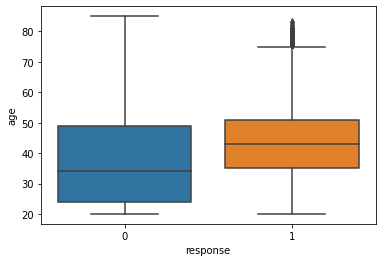

In [19]:
sns.boxplot(x='response', y='age', data=df4)

Para o grupo de pessoas que não estão interessadas (0), a mediana é de mais ou menos 35 anos, do primeiro ao terceiro quartil há uma  variáção de 25 a 50 anos. Já as pessoas interessadas no produto (1), a mediana de idades é maior, os primeiros e terceiros quartis são maiores também. 

Esta variável pode ser interessante para o modelo, pois indicam que pessoas mais novas não tem tanto interesse em seguros de vida, o que faz sentido.

<AxesSubplot:xlabel='age', ylabel='Count'>

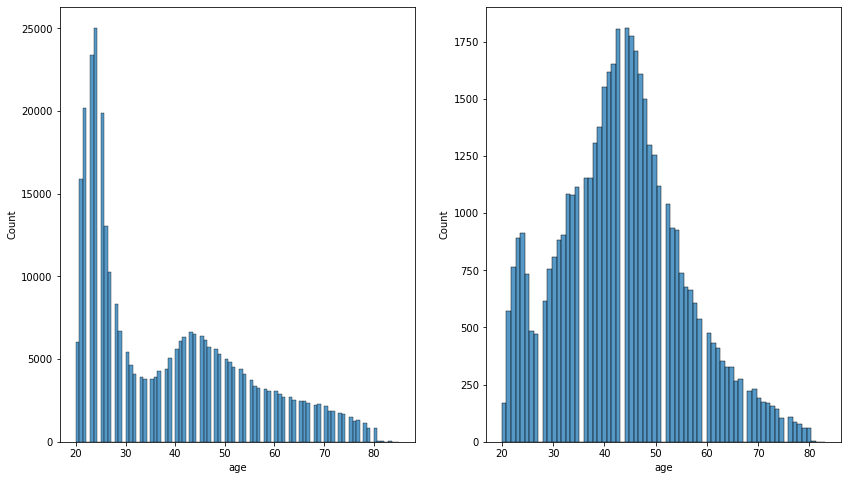

In [20]:
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1)
aux00 = df4.loc[df4['response'] == 0,'age']
sns.histplot(aux00)

plt.subplot(1,2,2)
aux01 = df4.loc[df4['response'] == 1,'age']
sns.histplot(aux01)

Existe uma concentração muito grande de pessoas sem interesse para age próximo de 20. Já para o histograma de pessoas com interesse, a maioria das idades estão entre 40 e 50 anos. Um ponto a ser observado é que há um possível desbalanceamento das variáveis, existe muito mais dados com "não" do que com "sim". Este ponto será melhor analisado mais a frente.

### anual_premium

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

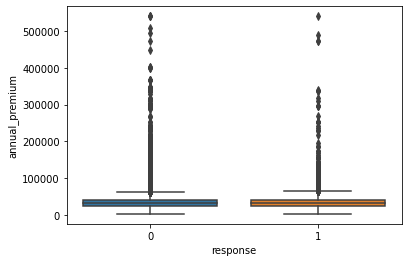

In [21]:
sns.boxplot(x='response', y='annual_premium', data=df4)

Como não é possível observar nada devido ao excesso de outliers, será analisado um corte nos dados para valores menores que 80000.

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

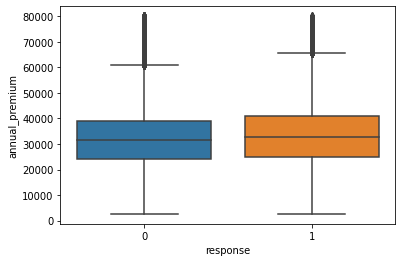

In [22]:
aux = df4[df4['annual_premium']<80000]
sns.boxplot(x='response', y='annual_premium', data=aux)

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

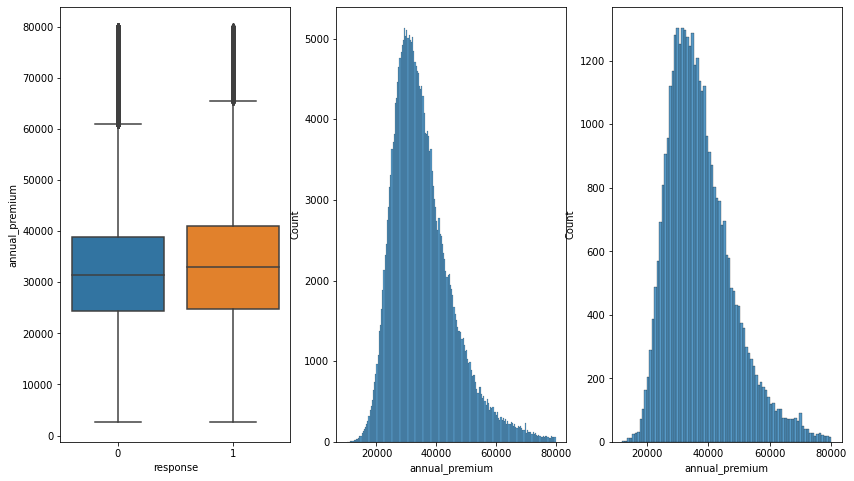

In [23]:
plt.figure(figsize=(14, 8))

plt.subplot(1,3,1)
aux = df4[df4['annual_premium']<80000]
sns.boxplot(x='response', y='annual_premium', data=aux)

plt.subplot(1,3,2)
aux2 = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium']<80000)]
aux00 = aux2.loc[aux2['response'] == 0,'annual_premium']
sns.histplot(aux00)

plt.subplot(1,3,3)
aux01 = aux2.loc[aux2['response'] == 1,'annual_premium']
sns.histplot(aux01)

Como são muito parecidas, é bem provável que não ajude a resolver o problema aqui, uma vez que não há uma separação entre as classes

### driving_license

<AxesSubplot:xlabel='response', ylabel='driving_license'>

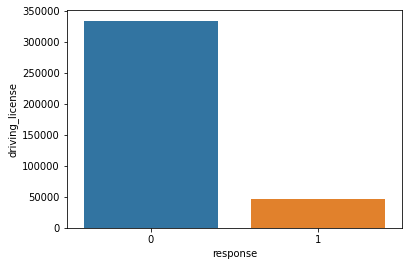

In [24]:
aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
sns.barplot(x='response', y='driving_license', data=aux)

Muito mais pessoas que dirigem e não querem fazer o seguro de carro.

In [25]:
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum()
aux

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


Ou seja, 87% das pessoas que dirigem não querem fazer o seguro e 12% dos que dirigem querem fazer seguro.

### region_code

In [26]:
df4[['region_code', 'response']].head()

,region_code,response
0,28.0,1
1,3.0,0
2,28.0,1
3,11.0,0
4,41.0,0


<AxesSubplot:xlabel='region_code', ylabel='id'>

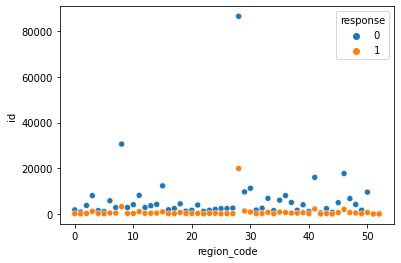

In [27]:
aux0 = df4[['id','region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()

sns.scatterplot(x='region_code', y='id', hue='response', data=aux0)

É possível observar o region_code 29, onde aproximadamente 80000 mil pessoas não estão interessadas em assinar o produto, enquanto 20000 estão interessadas. Nesta situação, é possível afirmar que há uma discriminação entre os dados, ou seja, é possível fazer uma separação clara entre as duas regiões. Entretanto, para todos os outros pontos há uma mistura entre 0 e 1. Então, analisando esta variável separadamente, não é interessante para o modelo.

### previously_insured

In [28]:
df4[['previously_insured', 'response']].head()

,previously_insured,response
0,0,1
1,0,0
2,0,1
3,1,0
4,1,0


In [29]:
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


A combinação (0,0) indica pessoas que não tinham seguro anteriormente e que também não querem este novo produto, 77% dos dados responderam esta alternativa. Para pessoas que anteriormente não tinham seguro e responderam que queriam o produto (0,1) foi de 22%. Das pessoas que já tinham seguro e não querem (1,0) foi de 99% e das que tem seguro e querem este novo produto, quase 0%. 

Vale salientar que aqui está sendo considerado pessoas que já tem um seguro de saúde anterior, então, faz sentido a porcentagem ser baixa. 

### vehicle_age

In [30]:
df4[['vehicle_age', 'response']].value_counts(normalize=True, sort=False).reset_index()

,vehicle_age,response,0
0,below_1_year,0,0.413488
1,below_1_year,1,0.018897
2,between_1_2_year,0,0.434285
3,between_1_2_year,1,0.091328
4,over_2_years,0,0.029663
5,over_2_years,1,0.012338


Então, pessoas com carros com idade abaixo de 1 anos, 41% responderam não querer seguro, enquanto 1,8% respondeu que querem. O mesmo se segue para as outras variáveis, uma taxa de rejeição muito alta, exceto para situação em que os carros tem mais de 2 anos. A princípio, a situação em que há uma discriminação dos valores mais clara ajude o modelo, entretanto, é necessário ver o efeito na hora de implementar mais a frente.

### vehicle_damage

### gender

### vintage

<AxesSubplot:xlabel='response', ylabel='vintage'>

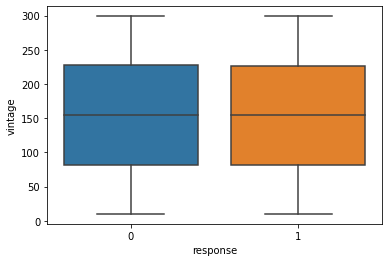

In [31]:
sns.boxplot(x='response', y='vintage', data=df4)

<AxesSubplot:xlabel='vintage', ylabel='Count'>

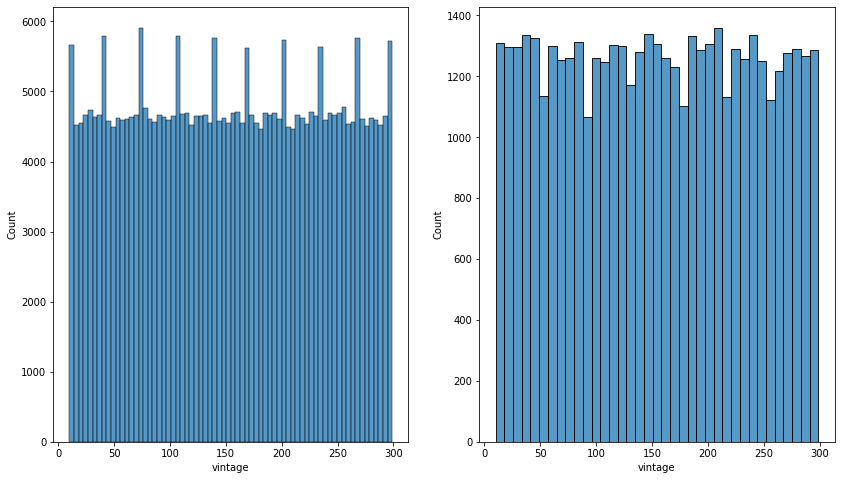

In [32]:
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1)
aux00 = df4.loc[df4['response'] == 0,'vintage']
sns.histplot(aux00)

plt.subplot(1,2,2)
aux01 = df4.loc[df4['response'] == 1,'vintage']
sns.histplot(aux01)

Vintage é exatamente o igual, isto se dá porque esta variável indica o tempo que as pessoas estão na base, isto é irrelevante para o modelo.

# 5.0 Data Preparation

In [33]:
df5 = df4.copy()

In [34]:
X = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(X, y, test_size=0.20)

df5 = pd.concat([x_train, y_train], axis=1)

## 5.1 Standardization

In [35]:
ss = pp.StandardScaler()
# annual_premium
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

In [36]:
df5.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 5.2 Rescaling

In [37]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform(df5[['age']].values)

# vintage
df5['vintage'] = mms_age.fit_transform(df5[['vintage']].values)

## 5.3 Encoder

In [38]:
# gender - One Hot Encoding / Target Encoding
target_encoding_gender = df5.groupby('gender')['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map(target_encoding_gender)

# region_code - Frequency Enconding / Target Encoding
target_encoding_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encoding_region_code)
# a target encoding nada mais é que a média da variável, também é conhecida como “mean” encoding.

# vehicle_age - One Hot Encoding / Order Encoding / Frequency Encoding
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age'])

# policy_sales_channel - Target Encoding / Frequency Encoding
frequency_encoding_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5.loc[:,'policy_sales_channel'] = df5['policy_sales_channel'].map(frequency_encoding_policy_sales_channel)
# Frequency Encoding está contando quanto cada categoria de policy sales channel tem e dividindo pelo total, 
# é uma frequencia de aparição. Quanto mais vezes ela aparece, maior o peso da categoria para a variável.

In [39]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_below_1_year,vehicle_age_between_1_2_year,vehicle_age_over_2_years
34802,34803,0.138640,0.569231,1,0.187307,0,1,-1.623494,0.025990,0.750865,1,0,1,0
315762,315763,0.138640,0.707692,1,0.124407,0,0,-1.623494,0.193632,0.186851,0,0,1,0
266557,266558,0.138640,0.030769,1,0.110027,1,0,0.265517,0.353492,0.858131,0,1,0,0
127856,127857,0.104262,0.353846,1,0.187307,1,0,1.055986,0.353492,0.840830,0,0,1,0
379632,379633,0.104262,0.061538,1,0.082787,0,1,0.742042,0.353492,0.692042,0,1,0,0


## 5.4 Validation Preparation

In [40]:
# gender
x_validation.loc[:, 'gender'] = x_validation.loc[:,'gender'].map(target_encoding_gender)

# age
x_validation.loc[:, 'age'] = mms_age.transform(x_validation[['age']].values)

# region_code
x_validation.loc[:,'region_code'] = x_validation.loc[:, 'region_code'].map(target_encoding_region_code)

# vehicle_age
x_validation = pd.get_dummies(x_validation, prefix='vehicle_age', columns=['vehicle_age'])

# annual_premium
x_validation['annual_premium'] = ss.fit_transform(x_validation[['annual_premium']].values)

# policy_sales_channel
x_validation.loc[:,'policy_sales_channel'] = x_validation['policy_sales_channel'].map(frequency_encoding_policy_sales_channel)

# vintage
x_validation['vintage'] = mms_age.fit_transform(x_validation[['vintage']].values)

# fillna
x_validation = x_validation.fillna(0) # tem regiões em region_code que após o target_encoding ficou com NA.

# 6.0 Feature Selection

## 6.2 Features Importancia

In [41]:
# model definition
forest = en.ExtraTreesClassifier(n_estimators = 250, random_state=0, n_jobs=-1)

# data preparation
x_train_n = df5.drop(['id', 'response'], axis=1)
y_train_n = y_train.values
forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking
                        feature  importance
0                       vintage    0.272871
0                annual_premium    0.244056
0                           age    0.164902
0                   region_code    0.105719
0                vehicle_damage    0.068890
0          policy_sales_channel    0.060348
0            previously_insured    0.055514
0      vehicle_age_below_1_year    0.014172
0  vehicle_age_between_1_2_year    0.006077
0                        gender    0.004823
0      vehicle_age_over_2_years    0.002117
0               driving_license    0.000509


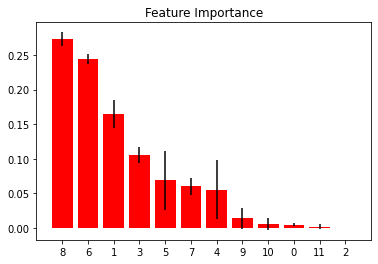

In [42]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# print the feature ranking
print('Feature Ranking')
df = pd.DataFrame()

for i,j in zip(x_train_n, forest.feature_importances_):
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    df = pd.concat([df, aux], axis=0)

print(df.sort_values('importance', ascending=False))

# plot the impurity-based feature importance of the forest
plt.figure()
plt.title('Feature Importance')
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

As features que explicam até 5% do fenômeno serão selecionadas aqui. 

# 7.0 Machine Learning Model

In [43]:
x_validation

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,vehicle_age_below_1_year,vehicle_age_between_1_2_year,vehicle_age_over_2_years
303324,303325,0.138640,0.141869,1,0.095257,1,0,-0.436530,0.209182,0.927336,0,1,0
122249,122250,0.138640,0.148789,1,0.187307,0,1,0.187328,0.193632,0.955017,0,1,0
210818,210819,0.104262,0.072664,1,0.129839,0,1,-0.047039,0.353492,0.688581,1,0,0
290867,290868,0.104262,0.055363,1,0.152189,0,1,-1.620305,0.015806,0.581315,0,1,0
310996,310997,0.104262,0.079585,1,0.104239,0,1,-0.381633,0.193632,0.422145,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108345,108346,0.138640,0.152249,1,0.096730,0,1,0.334568,0.004133,0.837370,0,1,0
146414,146415,0.138640,0.186851,1,0.187307,0,1,2.462187,0.209182,0.159170,0,1,0
39718,39719,0.104262,0.141869,1,0.187307,0,1,0.432013,0.193632,0.266436,0,1,0
156011,156012,0.104262,0.048443,1,0.072321,0,1,-1.620305,0.353492,0.643599,1,0,0


In [44]:
cols_selected = ['vintage', 'annual_premium', 'age', 'region_code', 
                 'vehicle_damage', 'policy_sales_channel', 'previously_insured']

x_train = df5[cols_selected]
x_val = x_validation[cols_selected]
y_val = y_validation.copy()

## 7.1 KNN

In [45]:
# model definition
knn_model = nh.KNeighborsClassifier(n_neighbors=7)

# model training
knn_model.fit(x_train, y_train)

# model prediction - Poder de GENERALIZACAO
yhat_knn = knn_model.predict_proba(x_val)

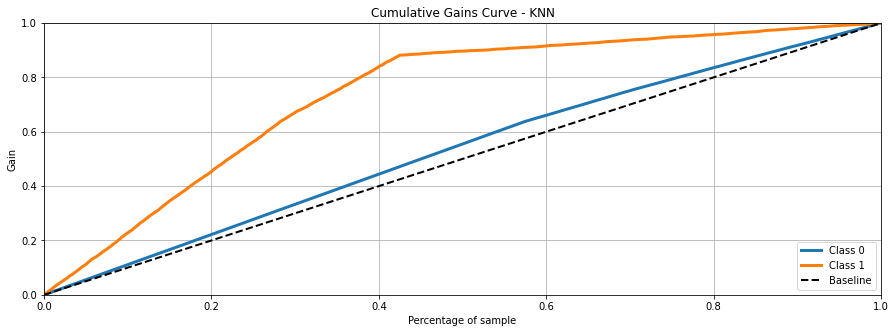

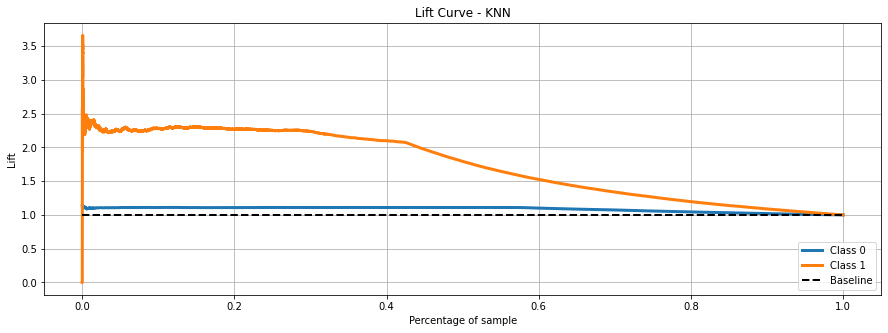

In [56]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn, figsize=(15, 5), title='Cumulative Gains Curve - KNN');
skplt.metrics.plot_lift_curve(y_val, yhat_knn, figsize=(15, 5), title='Lift Curve - KNN');

Este gráfico indica que se pegar o usuário, do dado de teste e calcular a probabilidade dele e olhar o primeiro usuário, definir se ele compraria ou não e fazer o acumulado disso, o plot é esta curva laranja. Abordando 20% da lista ordenada, alcançara 50% das pessoas interessadas. Quanto mais o modelo melhora, mais pessoas são atingidas na mesma porcentagem.

Em suma, se houver uma lista com 100 pessoas, ligando para as 20 primeiras, existe uma chance de 60% de todos quererem o produto.

## 7.2 Logistic Regression

In [47]:
# model definition
lr_model = lm.LogisticRegression(random_state=42)

# model training
lr_model.fit(x_train, y_train)

# model prediction - Poder de GENERALIZACAO
yhat_lr = lr_model.predict_proba(x_val)

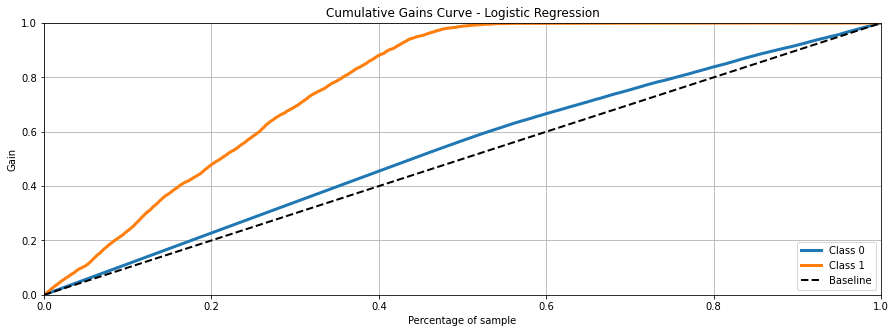

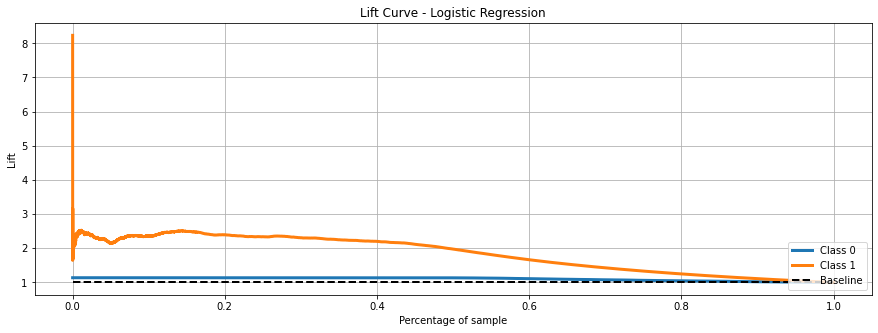

In [58]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr, figsize=(15, 5), title='Cumulative Gains Curve - Logistic Regression');
skplt.metrics.plot_lift_curve(y_val, yhat_lr, figsize=(15, 5), title='Lift Curve - Logistic Regression');

Então, em torno de 50% dos clientes abordados será selecionado 100% das pessoas que se interessam pelo produto. Assim, diminui-se o custo, uma vez que quanto maior a porcentagem da amostra, maior o custo. 

## 7.3 Extra Tree

In [49]:
# model definition
et = en.ExtraTreesClassifier(n_estimators = 1000, n_jobs=-1, random_state=42)

# model fit
et.fit(x_train,y_train)

# model predict
yhat_et = et.predict_proba(x_val)

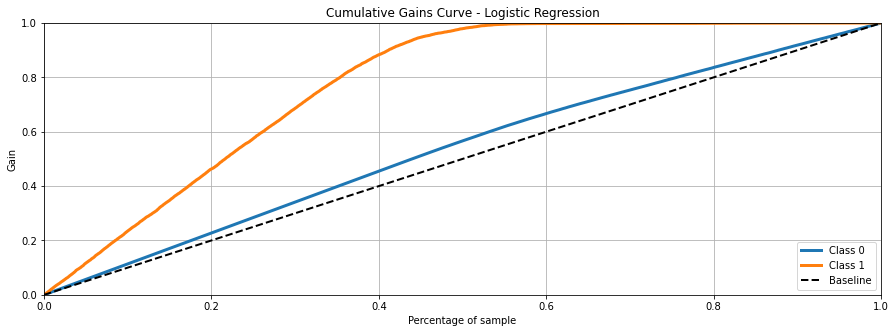

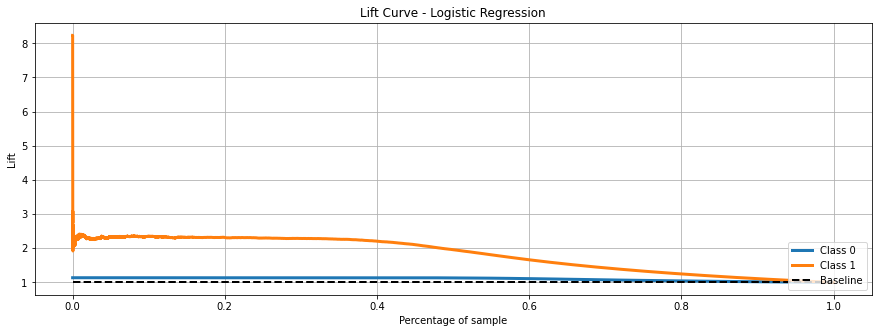

In [59]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_et, figsize=(15, 5), title='Cumulative Gains Curve - Logistic Regression');
skplt.metrics.plot_lift_curve(y_val, yhat_et, figsize=(15, 5), title='Lift Curve - Logistic Regression');

# 7.4 XGBoost

In [78]:
# model definition
xgb_model = xgb.XGBClassifier(n_estimators=11, max_depth=7)


# XGB training
xgb_model.fit(x_train,y_train)

# XGB prediction - Generalization
yhat_xgb = xgb_model.predict_proba(x_val)



# model definition
#et = en.ExtraTreesClassifier(n_estimators = 1000, n_jobs=-1, random_state=42)

# model fit
#et.fit(x_train,y_train)

# model predict
#yhat_et = et.predict_proba(x_val)

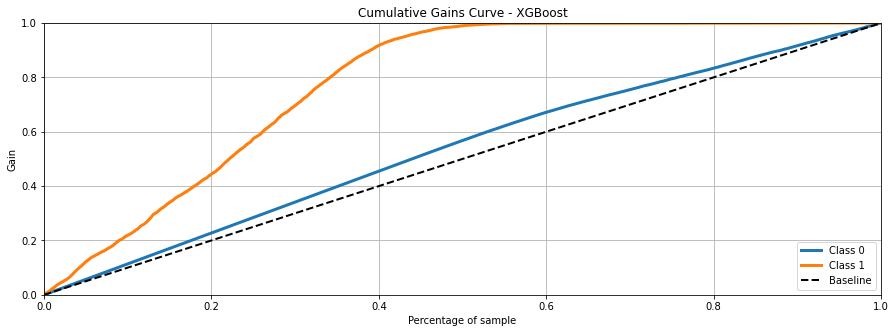

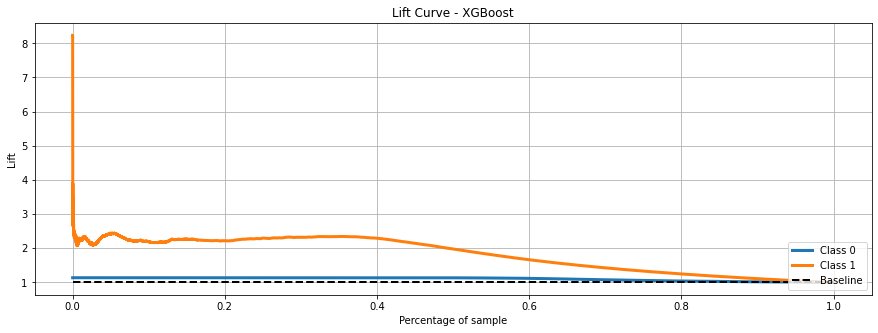

In [79]:
# Accumulative gain - XGB
skplt.metrics.plot_cumulative_gain(y_val, yhat_xgb, figsize=(15, 5), title='Cumulative Gains Curve - XGBoost')
skplt.metrics.plot_lift_curve(y_val, yhat_xgb, figsize=(15, 5), title='Lift Curve - XGBoost');

# 8.0 Model Performance

In [51]:
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:,1].tolist()

# sort clients by propensity score
df8 = df8.sort_values('score', ascending=False)

# compute precision at k


In [52]:
def precision_at_k(data, k=2000):
    # reset index
    data = data.reset_index(drop=True)

    # creating ranking order
    data['ranking'] = data.index+1

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    data[['id', 'response', 'score', 'ranking', 'precision_at_k']].head()
    
    return data.loc[k,'precision_at_k']

def recall_at_k(data, k=2000):
    # reset index
    data = data.reset_index(drop=True)

    # creating ranking order
    data['ranking'] = data.index+1

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    data[['id', 'response', 'score', 'ranking', 'precision_at_k']].head()
    
    return data.loc[k,'recall_at_k']

In [53]:
# reset index
df8 = df8.reset_index(drop=True)

# creating ranking order
df8['ranking'] = df8.index+1

df8['precision_at_k'] = df8['response'].cumsum() / df8['ranking']

df8[['id', 'response', 'score', 'ranking', 'precision_at_k']].head()

# compute precision at k
precision_at_50 = precision_at_k(df8,k=50)
print(f'Pecision at K: {precision_at_50}')

recall_at_50 = recall_at_k(df8,k=50)
print(f'Recall at K: {recall_at_50}')

Pecision at K: 0.35294117647058826
Recall at K: 0.0019442644199611147


# 9.0 Deploy to Production

# 9.1 Health Insurance Class